In [40]:
#hide
import sys
from IPython.display import HTML, display, Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys/')
from tools import (
    plotting as myplt,
    animation as myanim,
    coupling as bl,
    utils,
    matrix_lattice as ml,
    envelope_analysis as ea
)
from tools.utils import play, show
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['animation.embed_limit'] = np.inf

# Linear Particle Dynamics in an Accelerator
> Studying particle motion in the presence of time-dependent linear forces.

- toc: true 
- badges: false
- comments: true
- categories: [physics]
- image: images/chart-preview.png

To do:
* Spell check
* Make figures the right size 
* Make animations not cut off

## Introduction 

### What is a particle accelerator?

[Particle accelerators](https://en.wikipedia.org/wiki/Particle_accelerator) are machines which produce groups of charged particles (known as *beams*), increase their kinetic energy, and guide them to a target. These machines are invaluable to modern scientific research. The most famous examples are *colliders*, such as the [LHC](https://home.cern/science/accelerators/large-hadron-collider), in which two beams are smashed together to generate fundamental particles. A lesser known fact is that the fields of condensed matter physics, material science, chemistry, and biology also benefit tremendously from accelerators. For example, in scattering experiments a beam is collided with a target and the subsequent deflection of the beam is used to learn information about the target. This is accomplished with a neutron beam in *spallation neutron sources* such as [SNS](https://neutrons.ornl.gov/sns), with an electron beam in *electron scattering facilities* such as [CEBAF](https://science.osti.gov/np/Facilities/User-Facilities/CEBAF), or with photon beams in *synchrotron light sources* such as [APS](https://www.aps.anl.gov). In addition to scientific research, accelerators find use in [medicine](http://www.accelerators-for-society.org/health/index.php?id=7), particularly for cancer treatment, and also in various [industrial applications](http://www.accelerators-for-society.org/industry/index.php?id=8).

<img src="images/lhc.jpg" width="500">
<center>Detector in the LHC.</center>

There are generally a few property of the beam which are very important to experimentalists; in colliders it is the energy and luminosity, in spallation sources it is the intensity, and in light sources it is the brightness. There is thus a constant need to push these parameters to new regions. For example, below is the famous Livingston plot which shows the energy achieved by various machines over the past century (note on energy scale).

<img src="images/livingston.png" width="400">

There are many physics issues associated with the optimization of these beam parameters. *Accelerator physics* is a field of applied physics which studies these issues. The task of the accelerator physicist is to understand, control, and measure the journey of the beam from its creation to its final destination. The difficulty of this task has grown over time; the improvement accelerator performance has brought with it a staggering increase in size and complexity. The construction and operation of modern accelerators generally requires years of planning, thousands of scientists and engineers, and hundreds of millions or even billions of dollars.

Despite this complexity, the physics principles upon which these machines are built are quite simple. Most textbooks on the subject start with the motion of a particle in an accelerator under a few simplifying assumptions, so that the equations of motion have an analytic solution. This post basically sumarizes the results of such an analysis. I guess the target audience is an early undergraduate physics student.

### Physics principles

The force on a particle in an electric field $\mathbf{E}$ and a magnetic field $\mathbf{B}$ is given by

$$\mathbf{F} = q\left({\mathbf{E} + \mathbf{v} \times \mathbf{B}}\right),$$

where $\mathbf{v}$ is the particle velocity and $q$ is the particle charge. An accelerator consists of a series of elements, each with their own electromagnetic field. The collection of these elements is called a *lattice*. There are three basic things we need to be able to accomplish using these fields: acceleration, steering, and focusing. Acceleration is usually achieved in a linear accelerator (linac) using a series of cavities. The electric field in these cavities oscillates back and forth along the direction of motion, as shown by this fantastic animation from Wikipedia:

<img src="images/linac.gif" width="600">

In this post we will not consider acceleration, but will instead focus on steering and focusing, i.e., we assume the paricles move at a constant speed. We should define a coordinate system before going further. It is conventional to define the $s$ axis pointing pointing along the design trajectory, and the $x$ and $y$ axes defined in the plane transverse to $s$.

<img src="images/coordinate_system.png">

A particle on the design trajectory always has $x = y = 0$; however, in reality this is never true. Particles instead perform small oscillations about the design orbit in the transverse plane. It is also convenient to use to the slope, $x$', instead of the velocity. Usually $x$ and $y$ are measured in millimeters, and $x'$ and $y'$ are measured in milliradians ($\tan\theta \approx \theta$ for small $\theta$).

Now onto the second and third tasks: steering and focusing. The former determines the design trajectory, and the latter ensures particles stay close to the design trajectory. One thing that is interesting about the force from a magnetic field is that it becomes much stronger for a very energetic particle. Magnetic fields, not electric fields, are used for transverse steering and focusing for this reason.

The magnetic field used for steering is the dipole field given by 

$$\mathbf{B}_{dipole} \propto \hat{y}.$$

This will simply bend the particle in a circle in the horizontal plane. A dipole field can be formed by pointing the north pole of a magnet at the south pole of a different magnet. Next, quadrupole fields are used for focusing:

$$\mathbf{B}_{quad} \propto y\hat{x} + x\hat{y}.$$

A quadrupole field can be obtained by overlaying two dipole fields and rotating them 90 degrees relative to each other. These fields are shown below.

<img src="images/dipole_quadrupole.png">

The force from the quadrupole is focusing in the horizontal direction, but *defocusing* in the vertical direction; however, net focusing is still achieved by alternating the direction of the quadrupoles. This is analogous to a beam of light passign through a series of converging and diverging lenses. If the spacing and curvature of the lenses is correctly chosen, a net focusing can be achieved. In this sense the quadrupoles act as magnetic lenses, as illustrated below.

<img src="images/thinlens.png">

## Linear motion 
The elements we just listed, dipoles and quadrupoles, provide the core of most modern accelerators, and they all have the nice property that the force they exert is proportional to the displacement. An alternative way to say this is that the fields are *linear*. This reminds us of the system we all know and love: the harmonic oscillator. Of course, this is an approximation, and in reality the fields will contain higher order moments; however, in most cases it is a pretty good approximation, and making it allows us to write down exactly the position and momentum of a particle at every position in the lattice. 

### One-dimensional case

#### Hill's equation

We will first look at the one-dimensional (1D) case, which means we only consider motion along the horizontal (or vertical) direction. We can do this because the forces in the $x$ direction only depend on the $x$ coordinate. We could then write the following equation of motion:

$$x'' + k(s)x = 0.$$

This looks just like a harmonic oscillator, but the "spring constant" term $k$, which we will call the focusing strength, is time-dependent (remember $s$ is proportional to time). We will also make a key assumption that $k(s + L) = k(s)$ for some $L$. This is known as [Hill's equation](https://en.wikipedia.org/wiki/Hill_differential_equation), and was first introduced in 1886 to approximate the motion of the moon in a periodic potential. 

As with most differential equations, we will solve this equation by guessing the solution. We know that the solution in a region of constant $s$ will be either sinusoidal oscillations or exponential runaway, so we might expect to be able to stitch together a bunch of these sines and exponentials. The motion would not be harmonic oscillation, but would contain multiple harmonics. This can be put into math by suggesting the following solution:

$$x(s) = \sqrt{\epsilon}\,w(s) \cos\left({\mu(s) + \delta}\right).$$

This is pseudo-harmonic motion: the amplitude $w$ and phase $\mu$ are time-dependent. The function $w(s)$ is called the envelope function, and it is periodic ($w(s + L) = w(s)$. The constant $\epsilon$ will be defined shortly. Below is an example in what is known as a FODO (focus-off-defocus-off) lattice. The focusing strength is on the left, and the particle motion is on the right. For now we can think of the lattice repeating itself forever in the $s$ direction. Each black line represents the trajectory for a different initial position and slope, and the red line shows the envelope function. Even though the individual trajectories look kind of crazy, the envelope function is has a very simple form.

<img src="images/fodo.png">

#### Phase space

The particle motion becomes much easier to interpret if we observe it in position-momentum space, aka *phase space*. The following animation shows the position of a particle in phase space after each period in the above accelerator. The position shown is $s = nL/4$, where $n$ is the period number, which corresponds to the midpoint between the focusing and defocusing quadrupoles. We choose initial values of $x = 1$ and $x' = 0$.

In [34]:
#hide_input
lattice = ml.fodo(0.5, 0.5, 5.0, start='drift')
x = [1, 0, 0, 0]
X = lattice.track_part(x, nturns=40)

anim = myanim.corner_onepart(
    X, 
    dims=('x','xp'), 
    figsize=(6.5, 5), 
    show_history=True, 
    text_fmt='Period = {}',
    fps=3,
    label_kws=dict(fontsize='large'),
    tick_kws=dict(labelsize='large'),
    grid_kws=dict(alpha=0.11),
    history_kws=dict(alpha=0.2),
    text_kws=dict(fontsize='x-large'),
    s=20, color='k'
)
# play(anim)
anim

We see that the particle traces out an ellipse in phase space. If we go to a different position, the shape and orientation of the ellipse will change, but its area will be the same. As will be shown, it turns our that this area is proportional to the $\epsilon$ coefficient introduced earlier. So, it seems like the motion at one position is determined by the size and oriention of this ellipse, as well as the location of the paricle on the ellipse boundary. This motivates the definition of the so-called *Twiss parameters*:

$$\beta = w^2, \quad \alpha = -\frac{1}{2}\beta', \quad \gamma = \frac{1 + \alpha^2}{\beta}.$$

It should be noted that these parameters are different at each position in the lattice. Now, what is their physical meaning? $\beta$ is just the square of the envelope function, and $\alpha$ is proportional to the slope of $\beta$. The dimensions of the phase space ellipse are nicely described by these parameters:

<img src="images/csellipse.png" width=700>

The physical meanings of the Twiss parameters are as follows. First, the maximum position of the particle is determined by $\beta$. Second, the maximum slope of the particle is determined by $\gamma$. Third, $\alpha$ determines whether the maximum amplitude is changing at the given position. The last parameter is the phase advance $\mu$, which simply determines the position of the particle on the ellipse. Finally, the area of this ellipse, which is a constant of the motion, can be written nicely as

$$\epsilon = \beta {x'}^2 + 2\alpha xx' + \gamma x^2$$

for any $x$ and $x'$. The $\beta$ function and the phase advance are extremely important parameters to measure and control in a real machine. Below shows an example of the $\beta$ functions in the SNS accumulator ring.

<img src="images/beta_function_snsring.png">

#### Transfer matrices 

An extremely helpful tool to pair with the parameterization we just introduced is the *transfer matrix*, a matrix which connects the phase space coordinates at two different positions:

$$
\begin{bmatrix} x \\ x' \end{bmatrix}_{s} = 
\mathbf{M}(s)
\begin{bmatrix} x \\ x' \end{bmatrix}_{0}
$$

The transfer matrix can be written as $\mathbf{M} = \mathbf{V}\mathbf{P}\mathbf{V}^{-1}$, where

$$
\mathbf{V} = \frac{1}{\sqrt{\beta}}
\begin{bmatrix}
  \beta & 0 \\ -\alpha & 1
\end{bmatrix}
$$
and 
$$
\mathbf{P} = \begin{bmatrix}
  \cos\mu & \sin\mu \\ -\sin\mu & \cos\mu
\end{bmatrix}
$$

The effect of $\mathbf{V}^{-1}$ is to deform the phase space ellipse into a circle while preserving its area. $\mathbf{P}$ is then just a rotation in phase space, and $\mathbf{V}$ then transforms back into a tilted ellipse. This is illustrated below.

<img src="images/norm_coords_2D.png">

$\mathbf{V}$ can be thought of as a time-dependent transformation which removes the variance in the focusing strength, turning the the motion into a simple harmonic oscillator. There is much more to be said about 1D linear motion, but that is the gist of it. Particles move around the surface of an ellipse in phase space, the area of the ellipse is invariant, and the ellipse is the same at a fixed position in the lattice.

### Two-dimensional case (coupled motion)

This section will describe the Bogacz-Lebedev parameterization of 2D motion in the presence of time-dependent + coupled linear forces.

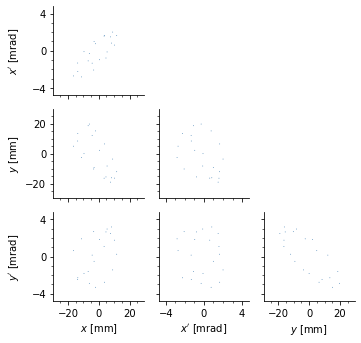

In [65]:
#hide
lattice = ml.fodo(0.2, 0.2, 5.0, start='drift', quad_tilt=1)

nturns = 20
eps1 = 42.5 # [mm-mrad]
eps2 = 7.5 # [mm-mrad]
psi1 = 0 # initial phase of eigenvector 1
psi2 = np.radians(90) # initial phase of eigenvector 2

# Form coordinate vector
x1 = np.real(np.sqrt(eps1) * lattice.v1 * np.exp(1j*psi1)) # mode 1 contribution
x2 = np.real(np.sqrt(eps2) * lattice.v2 * np.exp(1j*psi2)) # mode 2 contribution
x = x1 + x2

# Track
X1 = lattice.track_part(x1, nturns)
X2 = lattice.track_part(x2, nturns)
X = lattice.track_part(x, nturns)

myplt.corner(X, diag_kind=None);

In [66]:
#hide_input
anim = myanim.corner_onepart(
    X, 
    dims='all', 
    figsize=8, 
    show_history=True, 
    text_fmt='Period = {}',
    fps=30,
    grid_kws=dict(alpha=0.11),
    history_kws=dict(s=3, alpha=0.2),
    color='k',
    s=10
)
anim

## Conclusion

This section will wrap up the post and give a preview of things to come (space charge, simulation techniques, etc.)